<style type="text/css">
table td{
border:none;
}
</style>

<table>
    <tr>
        <td width=15%><img src="../img/logoIGE_Color_Light.jpg"></img></td>
        <td>
            <center>
                <h1>Machine Learning for prediciting RX localization</h1> <br>
                May - July 2022 <br>
                IGE internship
            </center>
            Renan MANCEAUX <br>
            Supervisor :<br>
            Thomas CHAUVE
        </td>
        <td width=20%><img src="../img/logo_UGA_imag.png"></img></td>
    </tr>
</table>

<center><h1> Machine learning : Testing Models </h1></center>

----------------------------

 <center><h1> Classification using SVM </h1></center>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append("../")
import utils

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn import svm

## Loading data

In [2]:
CI02 = utils.load_data("../data/for_learning/CI02.npy")
CI04 = utils.load_data("../data/for_learning/CI04.npy")
CI06 = utils.load_data("../data/for_learning/CI06.npy")
CI09 = utils.load_data("../data/for_learning/CI09.npy")
CI21 = utils.load_data("../data/for_learning/CI21.npy")

# Classification with learning on CI02

In [3]:
data = CI02

### Spliting dataset to train/test

In [4]:
X = data[['dist2GB', 'dist2TJ', 'schmid', 'diff_schmid','misangle','eqStrain','eqStress','act_pr','act_py','work']] 

y = data['Y']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # test_set random 20%

### Apply SVM classifier

In [5]:
clf = svm.SVC(kernel="rbf",class_weight={1: 10})

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

### Evaluation of the prediction

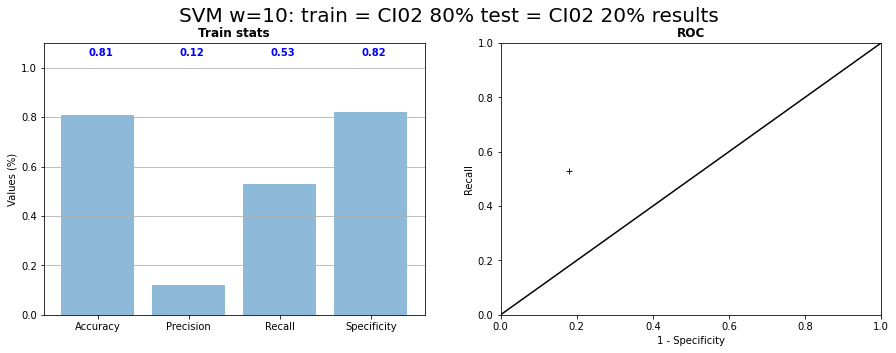

In [6]:
acc =metrics.accuracy_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)
spec = cm[0,0] / (cm[0,0] + cm[0,1])
utils.plot_lstats(acc,prec,rec,spec,model="SVM w=10: train = CI02 80% test = CI02 20%")

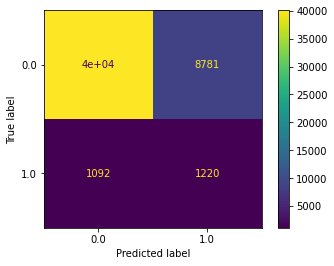

In [7]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred) 
plt.show()

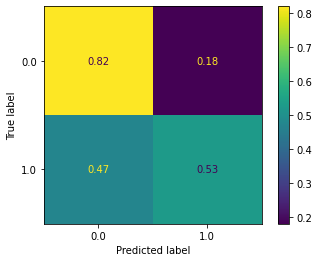

In [8]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,normalize="true")  
plt.show()

### Projection of test set

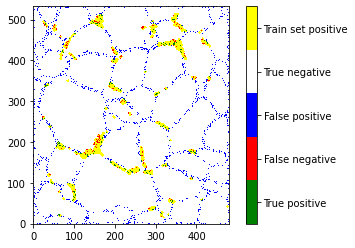

In [9]:
im_shape = np.shape(np.load("../data/for_learning/CI02.npy"))
utils.plot_pred_proj(y_pred,y_test,im_shape,y_train)

## Predict on CI02

In [10]:
X_val = CI02[['dist2GB', 'dist2TJ', 'schmid', 'diff_schmid','misangle','eqStrain','eqStress','act_pr','act_py','work']] 
y_val = CI02['Y'] 

In [11]:
y_pred = clf.predict(X_val)

### Evaluation of the prediction

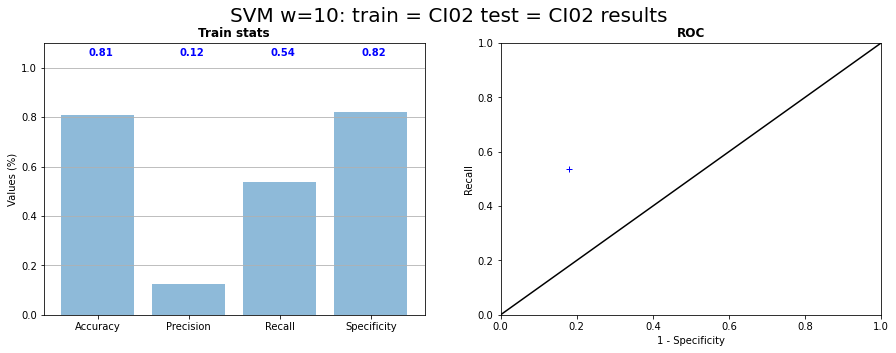

In [12]:
acc =metrics.accuracy_score(y_val, y_pred)
prec = metrics.precision_score(y_val, y_pred)
rec = metrics.recall_score(y_val, y_pred)
cm = metrics.confusion_matrix(y_val, y_pred)
spec = cm[0,0] / (cm[0,0] + cm[0,1])
utils.plot_lstats(acc,prec,rec,spec,model="SVM w=10: train = CI02 test = CI02")

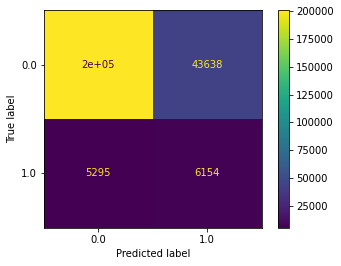

In [13]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred)
plt.show()

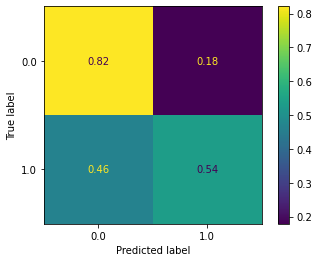

In [14]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred,normalize="true")  
plt.show()

### Projection of train/test set

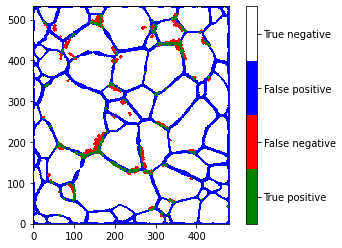

In [15]:
im_shape = np.shape(np.load("../data/for_learning/CI02.npy"))
utils.plot_pred_proj(y_pred,y_val,im_shape)

## Predict on CI04

In [16]:
X_val = CI04[['dist2GB', 'dist2TJ', 'schmid', 'diff_schmid','misangle','eqStrain','eqStress','act_pr','act_py','work']] 
y_val = CI04['Y'] 

In [17]:
y_pred = clf.predict(X_val)

### Evaluation of the prediction

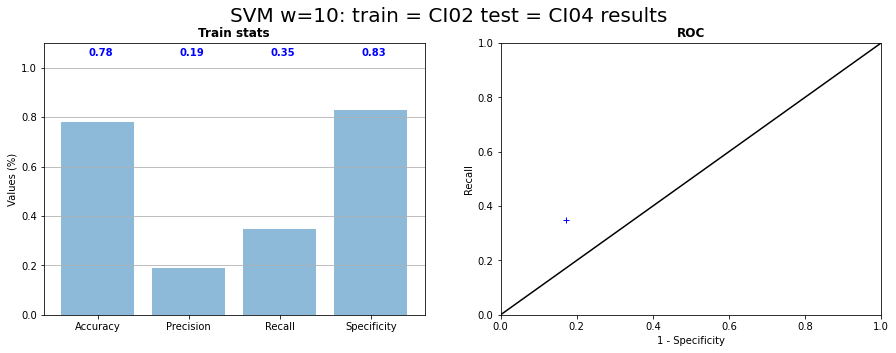

In [18]:
acc =metrics.accuracy_score(y_val, y_pred)
prec = metrics.precision_score(y_val, y_pred)
rec = metrics.recall_score(y_val, y_pred)
cm = metrics.confusion_matrix(y_val, y_pred)
spec = cm[0,0] / (cm[0,0] + cm[0,1])
utils.plot_lstats(acc,prec,rec,spec,model="SVM w=10: train = CI02 test = CI04")

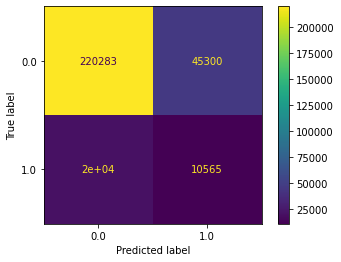

In [19]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred)
plt.show()

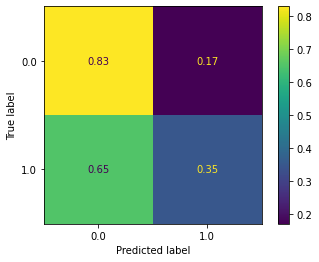

In [20]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred,normalize="true")  
plt.show()

### Projection of validation set

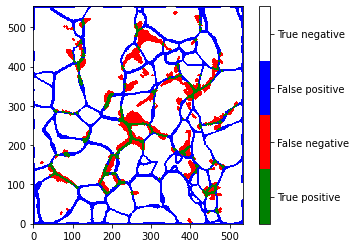

In [21]:
im_shape = np.shape(np.load("../data/for_learning/CI04.npy"))
utils.plot_pred_proj(y_pred,y_val,im_shape)

------------------------------------------------------------------

# Classification with learning on sub dataset of CI02 
Selection determinated by :

&emsp; $2 \times dist2GB + dist2TJ < 60$

### Selection of sub data

In [22]:
sub_data = data[(2*data["dist2GB"] + data["dist2TJ"] < 60)]

### Splitting sub data

In [23]:
X = sub_data[['dist2GB', 'dist2TJ', 'schmid', 'diff_schmid','misangle','eqStrain','eqStress','act_pr','act_py','work']] 
y = sub_data['Y']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # test_set random 20%

### Apply SVM Classifier

In [24]:
clf = svm.SVC(kernel="rbf",class_weight={1: 10})

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

### Evaluation of the prediction

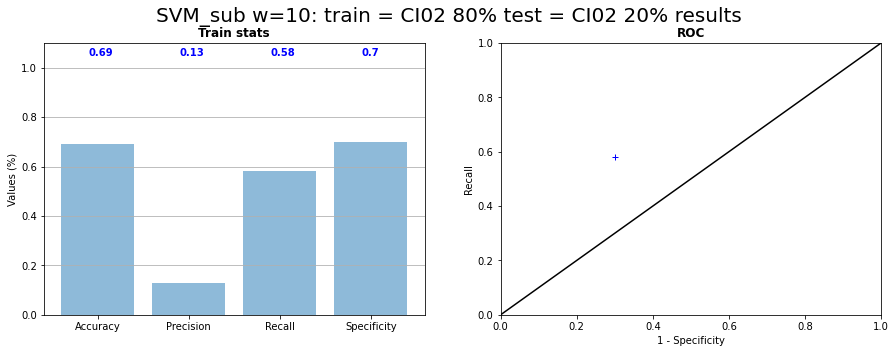

In [25]:
acc =metrics.accuracy_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)
spec = cm[0,0] / (cm[0,0] + cm[0,1])
utils.plot_lstats(acc,prec,rec,spec,model="SVM_sub w=10: train = CI02 80% test = CI02 20%")

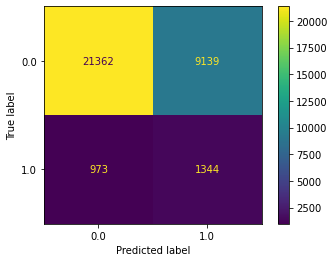

In [26]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)  
plt.show()

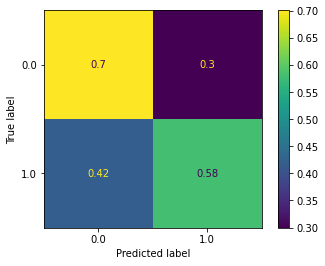

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,normalize='true')  
plt.show()

## Prediction on CI02

In [28]:
X_val = CI02[['dist2GB', 'dist2TJ', 'schmid', 'diff_schmid','misangle','eqStrain','eqStress','act_pr','act_py','work']] 
y_val = CI02['Y'] 

In [29]:
y_pred = clf.predict(X_val)

### Evaluation of the prediction

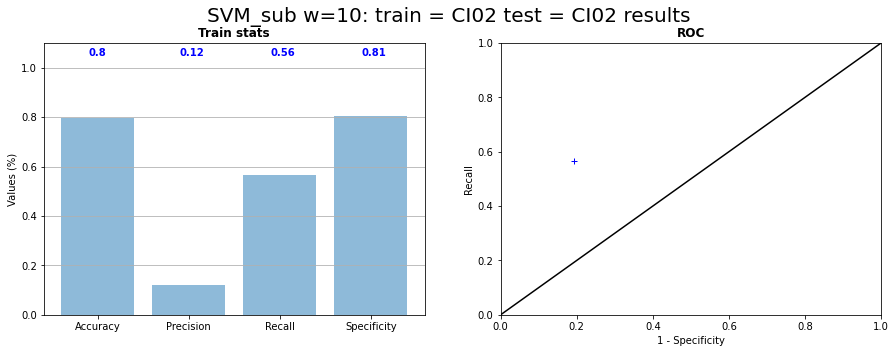

In [30]:
acc =metrics.accuracy_score(y_val, y_pred)
prec = metrics.precision_score(y_val, y_pred)
rec = metrics.recall_score(y_val, y_pred)
cm = metrics.confusion_matrix(y_val, y_pred)
spec = cm[0,0] / (cm[0,0] + cm[0,1])
utils.plot_lstats(acc,prec,rec,spec,model="SVM_sub w=10: train = CI02 test = CI02")

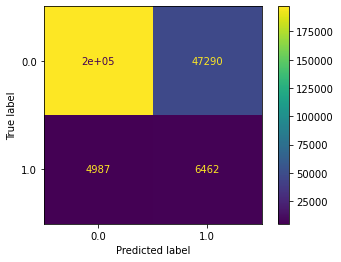

In [31]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred)  
plt.show()

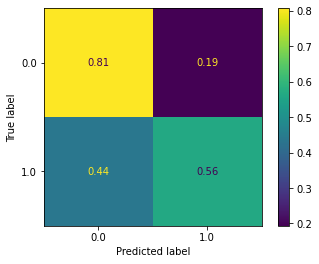

In [32]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred,normalize='true')  
plt.show()

### Projection of train/test set

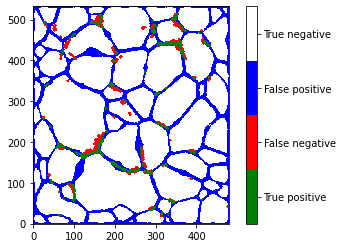

In [33]:
im_shape = np.shape(np.load("../data/for_learning/CI02.npy"))
utils.plot_pred_proj(y_pred,y_val,im_shape)

## Prediction on CI04

In [34]:
X_val = CI04[['dist2GB', 'dist2TJ', 'schmid', 'diff_schmid','misangle','eqStrain','eqStress','act_pr','act_py','work']] 
y_val = CI04['Y'] 

In [35]:
y_pred = clf.predict(X_val)

### Evaluation of the prediction

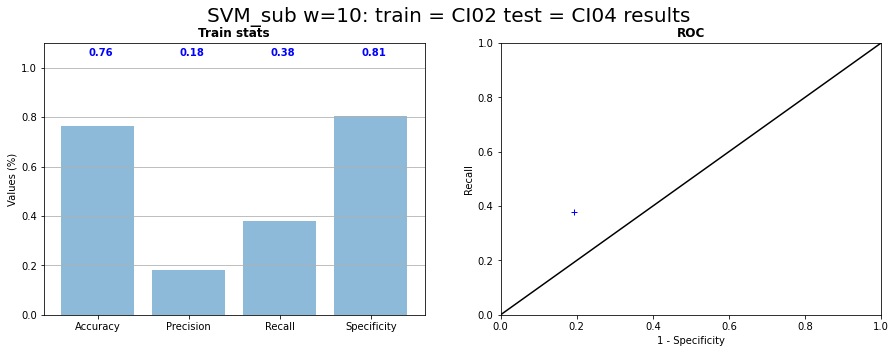

In [36]:
acc =metrics.accuracy_score(y_val, y_pred)
prec = metrics.precision_score(y_val, y_pred)
rec = metrics.recall_score(y_val, y_pred)
cm = metrics.confusion_matrix(y_val, y_pred)
spec = cm[0,0] / (cm[0,0] + cm[0,1])
utils.plot_lstats(acc,prec,rec,spec,model="SVM_sub w=10: train = CI02 test = CI04")

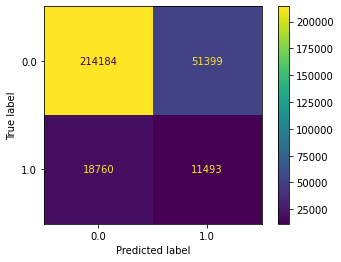

In [37]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred)  
plt.show()

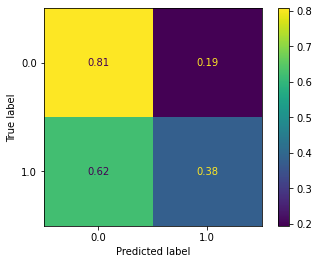

In [38]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred,normalize='true')  
plt.show()

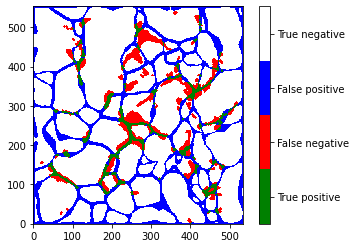

In [39]:
im_shape = np.shape(np.load("../data/for_learning/CI04.npy"))
utils.plot_pred_proj(y_pred,y_val,im_shape)